# Support Vector Regression (SVR)

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [34]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [35]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [36]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [37]:
y = y.reshape(len(y),1)

In [38]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [40]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [41]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [42]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [43]:
sc_y.inverse_transform([regressor.predict(sc_x.transform([[6.5]]))])

array([[170370.0204065]])

## Visualising the SVR results

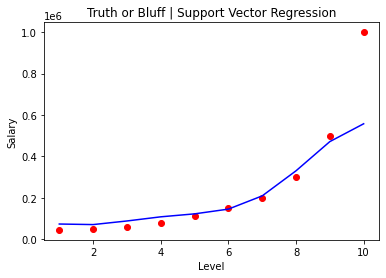

In [44]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform([regressor.predict(x)]).reshape(10,1), color='blue')
plt.title('Truth or Bluff | Support Vector Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

ValueError: ignored

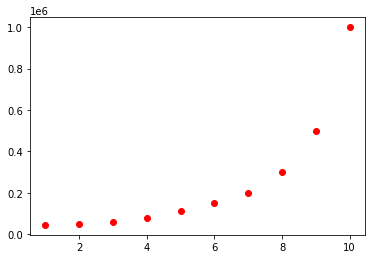

In [52]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x_grid), sc_y.inverse_transform([regressor.predict(x_grid)]).reshape(10,1), color = 'blue')
plt.title('Truth or Bluff | Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

ValueError: ignored

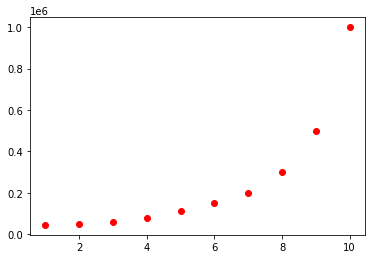

In [54]:
plt.scatter(sc_x.inverse_transform(x) , sc_y.inverse_transform(y),c='r')
x_grid = np.arange(min(x), max(x), 0.1)
plt.plot(sc_x.inverse_transform(x_grid), sc_y.inverse_transform([regressor.predict(x_grid)]).reshape((len(x_grid), 1)), c='b')
plt.title('SVR W/ higher resolution')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
x_grid = np.arange(1,10,0.1).reshape(-1,1)
plt.scatter(x,y,color = "red")
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))),color = 'blue')
plt.plot(x_grid,sc_y.inverse_transform(regressor.epsilon+svr_regressor.predict(sc_x.transform(x_grid))),color = 'green',linestyle="dashed")
plt.plot(x_grid,sc_y.inverse_transform(regressor.epsilon+svr_regressor.predict(sc_x.transform(x_grid))),color = 'green',linestyle="dashed")
plt.title('Level Vs. Salary(Smooth Curve with Epsilon)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()